In [1]:
from data.generator import generate_batch, get_vocab_size
from model.lstm import LSTM, DeepLSTM
from model.dntm.DynamicNeuralTuringMachine import DynamicNeuralTuringMachine
from model.dntm.DynamicNeuralTuringMachineMemory import DynamicNeuralTuringMachineMemory
from model.test import eval_lstm_padded, eval_dntm_padded
from train_lstm import step
from train_dntm import step as dntm_step
import torch
from pdb import set_trace

import seaborn as sns
import pandas as pd
from tqdm.notebook import trange

/home/fpetruzzellis/Progetti/lte/src/train_lstm.py:15: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="../conf/local", config_name="train_lstm")
/home/fpetruzzellis/Progetti/lte/src/train_dntm.py:16: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="../conf/local", config_name="train_dntm")


In [2]:
MAX_ITER = 1500
BS = 16
LR = 0.001
LEN = 2
NES = 1
HID_SIZE = 100
MEM_SIZE = 100
CON_SIZE = 8
ADD_SIZE = 8
DEVICE = 'cpu'

In [3]:
model = LSTM(
    input_size=get_vocab_size(),
    hidden_size=HID_SIZE,
    output_size=get_vocab_size(),
    batch_size=BS).to(DEVICE)

In [11]:
model = DeepLSTM(
    input_size=get_vocab_size(),
    hidden_size=HID_SIZE,
    output_size=get_vocab_size(),
    batch_size=BS).to(DEVICE)

In [3]:
dntm_memory = DynamicNeuralTuringMachineMemory(
    n_locations=MEM_SIZE,
    content_size=CON_SIZE,
    address_size=ADD_SIZE,
    controller_input_size=get_vocab_size(),
    controller_hidden_state_size=HID_SIZE)
model = DynamicNeuralTuringMachine(
    memory=dntm_memory,
    controller_hidden_state_size=HID_SIZE,
    controller_input_size=get_vocab_size(),
    controller_output_size=get_vocab_size()).to(DEVICE)

In [4]:
loss = torch.nn.CrossEntropyLoss(reduction='none')
opt = torch.optim.Adam(model.parameters(), lr=LR)

In [5]:
padded_samples_batch, padded_targets_batch, samples_len, targets_len = generate_batch(LEN, NES, BS)
padded_samples_batch, padded_targets_batch = padded_samples_batch.to(DEVICE), padded_targets_batch.to(DEVICE)

In [14]:
metrics = {
    'train_loss': [],
    'train_acc': [],
}

for i_step in trange(MAX_ITER):
    loss_step, acc_step = step(model, padded_samples_batch, padded_targets_batch, samples_len, targets_len, loss, opt, DEVICE)
    metrics['train_loss'].append(loss_step)
    metrics['train_acc'].append(acc_step)

  0%|          | 0/1500 [00:00<?, ?it/s]

In [6]:
metrics = {
    'train_loss': [],
    'train_acc': [],
}

for i_step in trange(MAX_ITER):
    loss_step, acc_step = dntm_step(model, padded_samples_batch, padded_targets_batch, samples_len, targets_len, loss, opt, DEVICE)
    metrics['train_loss'].append(loss_step)
    metrics['train_acc'].append(acc_step)

  0%|          | 0/1500 [00:00<?, ?it/s]

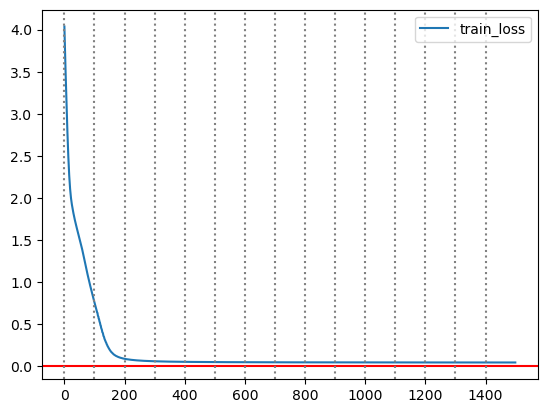

In [7]:
ax = sns.lineplot(pd.DataFrame({k: v for k, v in metrics.items() if 'train_loss' in k}))
_ = ax.axhline(0.0, color='red')
for x in range(0, 1500, 100): ax.axvline(x, color='gray', linestyle=":")

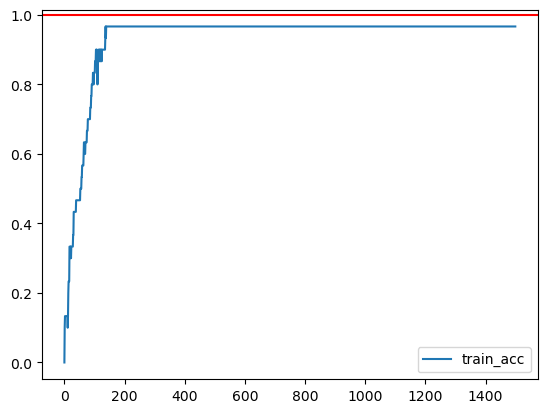

In [8]:
ax = sns.lineplot(pd.DataFrame({k: v for k, v in metrics.items() if 'train_acc' in k}))
_ = ax.axhline(1.0, color='red')

In [17]:
eval_lstm_padded(model, padded_samples_batch, padded_targets_batch, samples_len, targets_len, DEVICE)

print((5+9))##
out: 144
target: 14#



In [9]:
eval_dntm_padded(model, padded_samples_batch, padded_targets_batch, samples_len, targets_len, DEVICE)

print((5+4))##
out: 968
target: 9##

